In [1]:
# DARPA 2017년 설명 가능 인공지능(XAI, explaining AI) 프로젝트
# 결정트리
# 모든 노드가 2개 이하의 자식을 가진 이진트리
# 결정트리 알고리즘(아이디엉 차원에서 간단히)

In [2]:
# 유방암 데이터
from sklearn.datasets import load_breast_cancer

In [3]:
lbc = load_breast_cancer()
print(lbc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
lbc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
lbc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtc = DecisionTreeClassifier(max_depth=4, random_state=42)

In [8]:
dt = dtc.fit(lbc.data, lbc.target)

In [9]:
res = dt.predict(lbc.data)

In [10]:
sum(res==lbc.target)/len(res)

0.9824253075571178

In [11]:
# 결정트리 그리기
# !pip install pydotplus
import pydotplus
from sklearn import tree

In [12]:
dot = tree.export_graphviz(dt,feature_names=lbc.feature_names,class_names=lbc.target_names,
                    filled=True,node_ids=True,rounded=True)

In [13]:
graph = pydotplus.graph_from_dot_data(dot)

In [14]:
import os

In [15]:
os.environ['PATH']=os.environ['PATH']+ ':' + os.environ['CONDA_PREFIX']+r'\Library\bin\graphviz'

In [16]:
graph.write_png('tree.png')

True

In [17]:
x_test = lbc.data[10:11]
path = dt.decision_path(x_test)
path_seq = path.toarray()[0]

In [18]:
path_seq

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0], dtype=int64)

In [19]:
for n,value in enumerate(path_seq):
    node = graph.get_node(str(n))[0]
    if value ==0:
        node.set_fillcolor('white')
    else:
        node.set_fillcolor('green')
        print(node.get_attributes().get('label').split('\\n'))

['"node #0', 'worst radius <= 16.795', 'gini = 0.468', 'samples = 569', 'value = [212, 357]', 'class = benign"']
['"node #14', 'mean texture <= 16.11', 'gini = 0.109', 'samples = 190', 'value = [179, 11]', 'class = malignant"']
['"node #18', 'worst smoothness <= 0.088', 'gini = 0.023', 'samples = 173', 'value = [171, 2]', 'class = malignant"']
['"node #20', 'worst concavity <= 0.18', 'gini = 0.012', 'samples = 172', 'value = [171, 1]', 'class = malignant"']
['"node #21', 'gini = 0.375', 'samples = 4', 'value = [3, 1]', 'class = malignant"']


In [20]:
graph.write_png('tree_with_path_2.png')

True

In [21]:
lbc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

---

- 결정트리의 설명 능력의 한계
- 유방암데이터처럼 사람이 해석할 수 있는 특지응로 구성된 데이터에서만 설명 가능

- 결정트리의 성능 한계
- 선형분류기이다. 즉, 질문을 가지고 특징 공간을 직선으로 나누는 역할
- 성능상에 한계가 존재함

- 딥러닝은 성능은 높지만 설명기능이 약함
- 고차원 특성을 가지고, 수리적 계산으로 학습과 예측을 하기때문에
- Grad-CAM 기법 --> 딥러닝의 시각화 수준을 어느정도 설명함
- 이것은 앞으로도 계속해서 인공지능의 연구 주제가 됨

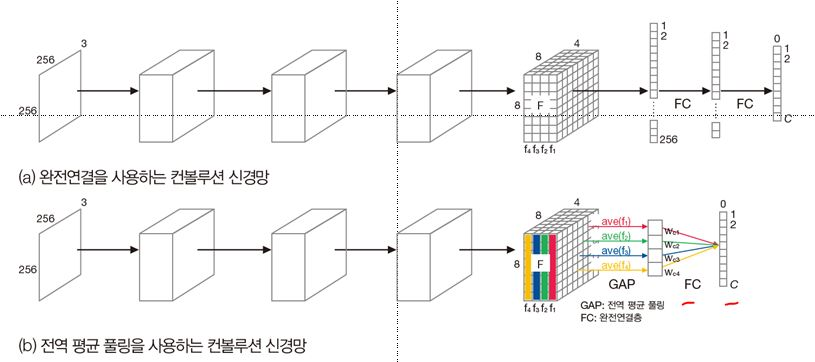

In [22]:
from IPython import display
display.Image('./img/040.jpg', width = 500, height = 500)

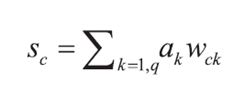

In [23]:
# Lin이 제안한 전역 평균 폴링
# GAP(Global Average Pooling)
display.Image('./img/041.jpg', width = 500, height = 500)
# ak는 k번째 특징 맵의 화소의 평균 값
# fijk는 특징 맵 fk의 i번째 행의 j번째 열에 있는 화소 값
display.Image('./img/042.jpg', width = 500, height = 500)

- 출력층의 노드 C는 아래 수식을 수행
- q는 특징맵의 개수(여기서는 4개) wck는 k번째 특징맵과 c번째 출력노드를 연결하는 가중치
- 출력노드는 softmax를 적용 0c = softmax(Sc)를 출력

- 완전연결층에는 qc개의 가중치만 있음
- 만약에 숫자 인식이라면 c=10 불가 40개의 가중치만 있음
- 그전에 컨볼루션 신경망에는 가중치가 대략 2만개 이상

- CAM(class activation map)은 시각화 수준의 설명 가능 기법
- 전역폴링이 제공하는 정보를 활용해 컨볼루션 신경망의 분류결과에 대해 설명하는 기법

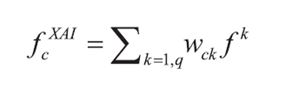

In [24]:
# F층을 구성하는 특징 맵 F1,F2,F3,F4 의미 있는 고급 특징을 표현(ex. 눈,코,입 등...)
# 특징맵을 선형 결합
display.Image('./img/043.jpg', width = 500, height = 500)
# Cam에서는 F(xai, c)를 heatmap이라고 함

In [25]:
# 왼쪽 3개 이미지는  c = 'briard'
# 오른쪽 3개이미지는 c = 'barbell'

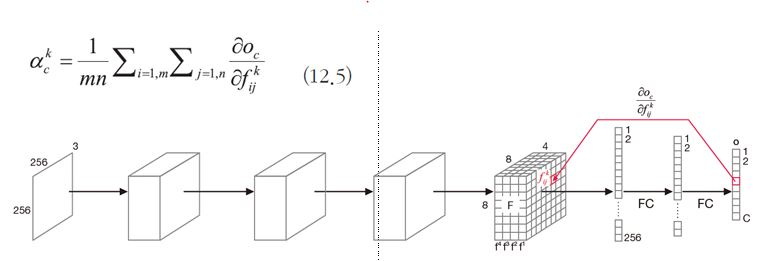

In [26]:
display.Image('./img/044.jpg', width = 500, height = 500)
# CAM은 현식적이지만 한계 : 전역폴링에 의지함, 전역평균 폴링을 사용하지 않는 모델에는 적용이 불가능
# GeadCam은 CAM의 확장
# 전역 평균 폴링을 사용하지 않는 모델에도 적용 가능
display.Image('./img/045.jpg', width = 500, height = 500)
# akc : k번째 특징 맵의 gradient에 전역 평균 폴링을 적용

In [27]:
# 사전 학습된 컨볼루션 신경망에 GeadCAM을 적용

In [28]:
# ResNet50 모델에 GradCAM을 적용
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import resnet50,ResNet50
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [29]:
# 사전 학습된 신경망 모델을 불러오고 신경망 구조를 확인
model = ResNet50(weights='imagenet')
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

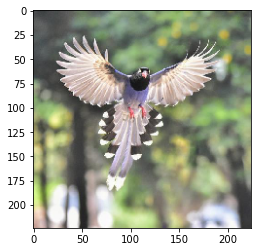

In [30]:
# 지정된 영상을 불러와 크기 조정하고 화면에 디스플레이
image_path = './bird.jpg'
img = image.load_img(image_path,target_size=(224,224))
plt.imshow(img)

In [31]:
# a = image.load_img(image_path) 
# a = image.img_to_array(a)
# a.shape

##### 영상을 신경망 입력형태로 변환

In [32]:
image.img_to_array(img).shape

(224, 224, 3)

In [33]:
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [34]:
x = np.expand_dims(x,axis=0)  # 차수 확장
x.shape

(1, 224, 224, 3)

In [35]:
x = resnet50.preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [36]:
preds = model.predict(x)

In [37]:
resnet50.decode_predictions(preds,top=5)

[[('n01616318', 'vulture', 0.2640146),
  ('n01833805', 'hummingbird', 0.22697014),
  ('n01608432', 'kite', 0.08064109),
  ('n01829413', 'hornbill', 0.074656114),
  ('n01795545', 'black_grouse', 0.06727844)]]

In [38]:
# 인식 시도한 predict의 top-5결과를 출력
print("예측결과:",resnet50.decode_predictions(preds,top=5)[0])

예측결과: [('n01616318', 'vulture', 0.2640146), ('n01833805', 'hummingbird', 0.22697014), ('n01608432', 'kite', 0.08064109), ('n01829413', 'hornbill', 0.074656114), ('n01795545', 'black_grouse', 0.06727844)]


In [39]:
last_conv_layer =  model.get_layer("conv5_block3_out")
model_1 = keras.Model(model.inputs,last_conv_layer.output)

In [40]:
# 분류(전역폴링 또는 완전연결층) 부분만으로 구성된 model_2 
input_2 = keras.Input(shape=last_conv_layer.output.shape[1:])
x_2 = model.get_layer('avg_pool')(input_2)
x_2 = model.get_layer('predictions')(x_2)
model_2 = keras.Model(input_2,x_2)

In [41]:
# 분류(전역폴링 또는 완전연결층) 부분만으로 구성된 model_2 
input_2 = keras.Input(shape=last_conv_layer.output.shape[1:])
x_2 = model.get_layer('avg_pool')(input_2)
x_2 = model.get_layer('predictions')(x_2)
model_2 = keras.Model(input_2,x_2)

In [42]:
# Gradient Tape  자동미분과 오차역전파
# GradientTape 함수를 이용한 그레이던트 계산
# 마지막층으로 미분하기 위한 준비
with tf.GradientTape() as tape:
    output_1 = model_1(x)
    tape.watch(output_1)
    preds = model_2(output_1)
    class_id = tf.argmax(preds[0])
    output_2 = preds[:,class_id]

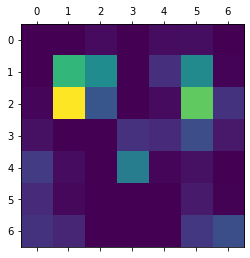

In [43]:
# 그레이던트 계산
grads =  tape.gradient(output_2,output_1)
pooled_grads = tf.reduce_mean(grads,axis=(0,1,2))   # 수식1을 적용
output_1 =  output_1.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):   # 수식2를 적용
    output_1[:,:,i]*=pooled_grads[i]
heatmap = np.mean(output_1,axis=-1)    
heatmap = np.maximum(heatmap,0) / np.max(heatmap)  # [0,1]로 정규화
plt.matshow(heatmap)

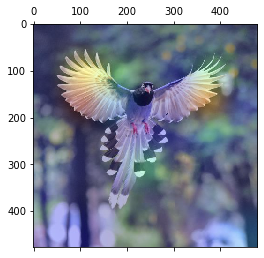

In [44]:
# heatmap을 입력 영상에 덧씌움
img = image.load_img(image_path)    # 영상을 다시 받아옴
img = image.img_to_array(img)
heatmap = np.uint8(255*heatmap)  # [0,255] 로 변환
jet = cm.get_cmap("jet")
color = jet(np.arange(256))[:,:3]
color_heatmap = color[heatmap]
color_heatmap = keras.preprocessing.image.array_to_img(color_heatmap)
color_heatmap = color_heatmap.resize( (img.shape[1],img.shape[0]) )
color_heatmap = keras.preprocessing.image.img_to_array(color_heatmap)
overlay_img = color_heatmap*0.4+img
overlay_img = keras.preprocessing.image.array_to_img(overlay_img)
plt.matshow(overlay_img)

In [45]:
# Xception에 GradCAM을 적용
from tensorflow.keras.applications import xception
# 사전 학습된 신경망 모델을 불러오고 신경망 구조를  확인
model = xception.Xception(weights='imagenet')
model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

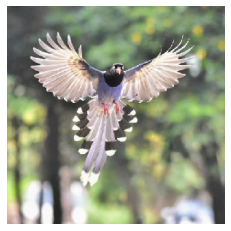

In [46]:
# 지정된 영상을 불러와서 크기를 조정하고 화면에 디스플레이
image_path = './bird.jpg'
img = image.load_img(image_path,target_size=(299,299))
plt.imshow(img)
plt.axis('off')
plt.show()

In [47]:
# 영상을 신경망 입력 형태로 변환
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
x = xception.preprocess_input(x)

In [48]:
# 인식을 시도하고 top-5 결과를 출력
preds = model.predict(x)

In [49]:
#예측결과
xception.decode_predictions(preds,top=5)[0]

[('n01616318', 'vulture', 0.19380733),
 ('n01608432', 'kite', 0.17258258),
 ('n01795545', 'black_grouse', 0.07082903),
 ('n01818515', 'macaw', 0.06488892),
 ('n01806567', 'quail', 0.046111554)]

In [50]:
# 신경망 모델의 특징 추출(컨볼류션층) 부분에서 마지막 층을 지정
# 특징 추출 부분만으로 구성된 모델 model_1 만들기
last_conv_layer = model.get_layer("block14_sepconv2_act")
model_1 = keras.Model(model.inputs,last_conv_layer.output)

In [51]:
# 분류 부분만으로 구성된 모델 2
input_2 = keras.Input(shape=last_conv_layer.output.shape[1:])
x_2 = model.get_layer('avg_pool')(input_2)
x_2=model.get_layer('predictions')(x_2)
model_2 = keras.Model(input_2,x_2)

In [52]:
# gradientTape 함수를 이용한 그레이디언트 계산
with tf.GradientTape() as tape:
    output_1 = model_1(x)
    tape.watch(output_1)
    preds = model_2(output_1)
    class_id = tf.argmax(preds[0])
    output_2 = preds[:,class_id]
type(output_1)

tensorflow.python.framework.ops.EagerTensor

In [53]:
# gradient 계산
grads = tape.gradient(output_2,output_1)
pooled_grads = tf.reduce_mean(grads,axis=(0,1,2))
pooled_grads

<tf.Tensor: shape=(2048,), dtype=float32, numpy=
array([-1.0932899e-05, -3.3722776e-05,  7.4992982e-05, ...,
        3.8763970e-05,  6.0293936e-05, -1.7254608e-04], dtype=float32)>

In [54]:
type(output_1)

tensorflow.python.framework.ops.EagerTensor

In [55]:
output_1 = output_1.numpy()[0]
pooled_grads = pooled_grads.numpy()
for i in range(pooled_grads.shape[-1]):
    output_1[:,:,i]*= pooled_grads[i]
heatmap = np.mean(output_1,axis=-1)    

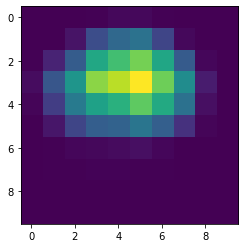

In [56]:
#[0,1] 정규화
heatmap = np.maximum(heatmap,0) / np.max(heatmap)
plt.imshow(heatmap)

In [57]:
# 열 지도를 입력 영상에 덧씌움
img = image.load_img(image_path)
img=image.img_to_array(img)
heatmap = np.uint8(255*heatmap)  # [0,255]로 변환

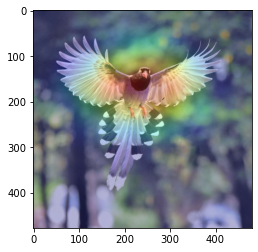

In [58]:
# [0,255] heatmap을 jet 컬러맵으로 표시
jet = cm.get_cmap('jet')
color = jet(np.arange(256))[:,:3]
color_heatmap = color[heatmap]
color_heatmap = keras.preprocessing.image.array_to_img(color_heatmap)
color_heatmap = color_heatmap.resize( (img.shape[1], img.shape[0]) )
color_heatmap = keras.preprocessing.image.img_to_array(color_heatmap)
overlay_img=color_heatmap*0.4+img
overlay_img=keras.preprocessing.image.array_to_img(overlay_img)
plt.imshow(overlay_img)